# Introduction to Perceptrons
Gina Nguyen
Machine Learning Basics

# Implementing Perceptrons from Scratch
The following blocks of code will:
1. Implement a perceptron loss function to train the model
2. Test the model.
3. Compare the perceptron loss function from sklearn's native perceptron function.

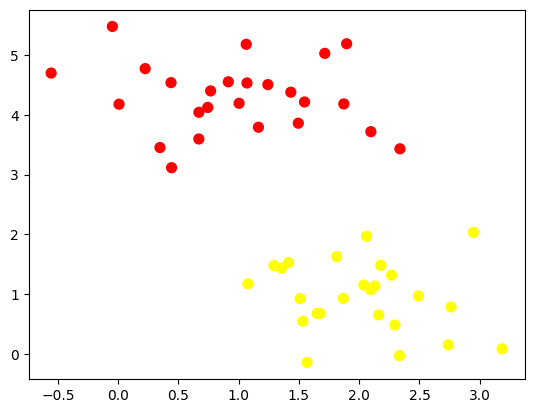

In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#Using the make_blobs function to create the data set
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn');

#Splitting the dataset into a training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 5) #the same train/test split as in the linear regression above

## Equations for Perceptron Loss
Given the hypothesis space is the $ y_{predicted} = sign(w^Tx + b) $ 

$ perceptron \ loss = \sum_m max \{ 0, -y^m (w^Tx^m + b)\} $

Equations for computing loss and updating perceptron weights:

$ \delta _i = y_i - w(x_i) $

$ w_i = w_i + \alpha \delta _i (x_i) $

where $\alpha$ is the learning rate

Resources:
- https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
- https://github.com/pallavibharadwaj/Machine-Learning/blob/master/perceptron.ipynb


Training accuracy:  1.0
Testing accuracy:  1.0


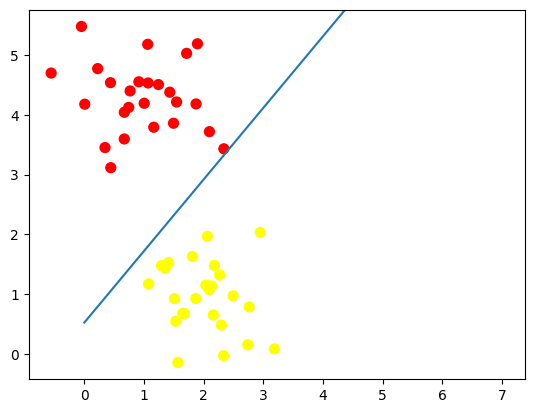

In [10]:
#Implementing the perceptrons
def perceptrons():
    L = 1 #the learning rate
    iterations = 10
    i= np.arange(1, iterations+1) #creates an ndarray with evenly spaced values and returns the reference to it.


    #Setting all the weights to 0
    wP = np.zeros(shape=(1, x_train.shape[1]+1))#remember that in the case of perceptron, the bias counts as a weight (therefore +1)

    #Keeping track of what is missclassified to make sure code is working
    misclassified = []

    #Adjusting the weights of the perceptron
    for i in range (iterations):
        misclassed = 0
        for x_i, label in zip(x_train, y_train):

            x_i = np.insert(x_i, 0, 1) #inserts 1 for the bias
            y_i = np.matmul(wP, x_i)
            target = 1  if (y_i>0) else 0 #the step function that returns a 1 if y_i is greater than 0, otherwise returns a 0

            #Finding if the actual - the predicted equal 0 (if it does equal 0, no updates need to be made to the weight)
            delta = (label-target)
            #The goal is for delta to be zero bc that means that no adjustments need to be made

            if (delta): #the if function, when the inside argument is not 0, assumes that its true
                misclassed += 1
                wP += delta*x_i #subgradient
        misclassified.append(misclassed)

    #print (misclassified)
    return (wP)

wP = perceptrons()

#Printing the accuracy score
from sklearn.metrics import accuracy_score

wP_nobias = wP[0][1:] #w with no bias, which I will use to check accuracy

def sign_func(value): #this step function is the subgradient descent
    return 1 if (value > 0) else 0
vector_step = np.vectorize(sign_func) #So that the step function is applied to every element in the array

#Training set:
y_predpercept = vector_step(np.matmul(x_train, np.transpose(wP_nobias)))
print("Training accuracy: ", accuracy_score(y_train, y_predpercept))

#Training set:
y_predpercept = vector_step(np.matmul(x_test, np.transpose(wP_nobias)))
print("Testing accuracy: ", accuracy_score(y_test, y_predpercept))


#Showing the results on the scatterplot:
def plot_perceptron(ax = None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_grid = np.linspace(xlim[0], xlim[1], 30)
    y_grid = np.linspace(ylim[0], ylim[1], 30)
    Y_grid, X_grid = np.meshgrid(y_grid, x_grid)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    x1 = np.linspace(0,7,50)
    x2 = -wP[0,1]*x1/wP[0,2] - wP[0,0]/wP[0,2]
    plt.plot(x1,x2)

    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_perceptron()

Training accuracy:  1.0
Testing accuracy:  1.0


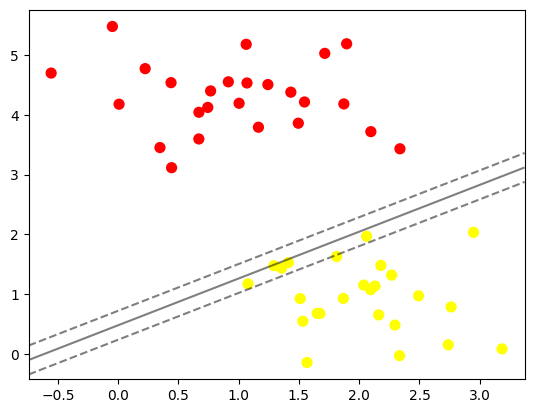

In [7]:
#Comparing the results of the perceptron with the sklearn model:
from sklearn.linear_model import Perceptron
Pmodel = Perceptron(tol=1e-3, random_state=0)
Pmodel.fit(x_train, y_train)

def plot_perceptron_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for the perceptron"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x_grid = np.linspace(xlim[0], xlim[1], 30)
    y_grid = np.linspace(ylim[0], ylim[1], 30)
    Y_grid, X_grid = np.meshgrid(y_grid, x_grid)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    P = model.decision_function(xy).reshape(X_grid.shape)
    
    # plot decision boundary and margins
    ax.contour(X_grid, Y_grid, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_perceptron_decision_function(Pmodel)

print("Training accuracy: ", accuracy_score(y_train, Pmodel.predict(x_train)))
print("Testing accuracy: ", accuracy_score(y_test, Pmodel.predict(x_test)))